In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

sns.set()
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')
features.head(3)

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'easy listening', 'mellow gold']",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e5312be7ccce98176cff46d7879?cid=b8d3901151d34489a160e3cf0ab1fa94,166106.0,0.0,The Essential Andy Williams,0.154,0.185,5.0,-14.063,1.0,0.0315,0.911,0.000267,0.112,0.15,83.969,4.0,38.0


In [3]:
features.dtypes

SongID                        object
Performer                     object
Song                          object
spotify_genre                 object
spotify_track_id              object
spotify_track_preview_url     object
spotify_track_duration_ms    float64
spotify_track_explicit       float64
spotify_track_album           object
danceability                 float64
energy                       float64
key                          float64
loudness                     float64
mode                         float64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature               float64
spotify_track_popularity     float64
dtype: object

In [4]:
#Correlation Matrix of All "float64" data types in Features Dataset 
features.corr()

,spotify_track_duration_ms,spotify_track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
spotify_track_duration_ms,1.000000,0.037873,0.082372,0.124426,0.009925,0.032936,-0.119509,0.028231,-0.288424,0.018834,-0.031804,-0.145971,-0.019204,0.070666,0.179856
spotify_track_explicit,0.037873,1.000000,0.286739,0.070231,0.013422,0.229670,-0.147062,0.540299,-0.189194,-0.071944,0.012291,-0.160362,0.013347,0.075168,0.342844
danceability,0.082372,0.286739,1.000000,0.201626,0.013837,0.137491,-0.160220,0.255189,-0.314103,-0.001380,-0.130453,0.385340,-0.144873,0.223004,0.181867
energy,0.124426,0.070231,0.201626,1.000000,0.021890,0.684524,-0.101954,0.133381,-0.585924,-0.001050,0.111920,0.353975,0.159910,0.227673,0.175161
key,0.009925,0.013422,0.013837,0.021890,1.000000,0.008074,-0.142821,0.022403,-0.021483,0.003507,-0.001884,0.012130,-0.014401,0.009631,0.001436
loudness,0.032936,0.229670,0.137491,0.684524,0.008074,1.000000,-0.080778,0.172089,-0.407646,-0.134553,0.042432,0.017844,0.094343,0.122770,0.350541
mode,-0.119509,-0.147062,-0.160220,-0.101954,-0.142821,-0.080778,1.000000,-0.134765,0.141425,-0.010064,0.013188,-0.016401,0.017642,-0.056435,-0.119419
speechiness,0.028231,0.540299,0.255189,0.133381,0.022403,0.172089,-0.134765,1.000000,-0.156343,-0.057643,0.078019,-0.027739,0.063110,0.086314,0.211415
acousticness,-0.288424,-0.189194,-0.314103,-0.585924,-0.021483,-0.407646,0.141425,-0.156343,1.000000,0.028244,0.040294,-0.119750,-0.104339,-0.215204,-0.301748
instrumentalness,0.018834,-0.071944,-0.001380,-0.001050,0.003507,-0.134553,-0.010064,-0.057643,0.028244,1.000000,-0.010927,0.049632,0.002594,0.008628,-0.121533


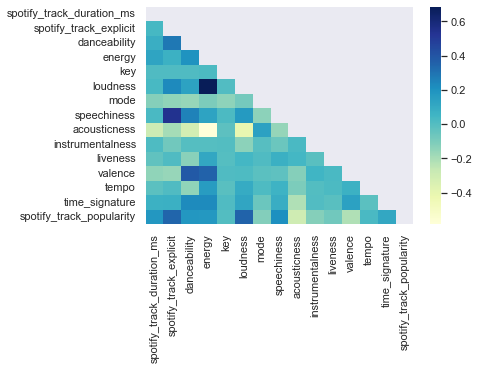

In [5]:
mask = np.triu(np.ones_like(features.corr()))
dataplot = sns.heatmap(features.corr(), cmap="YlGnBu", annot=False, mask=mask);

In [6]:
#Check Null Values across dataset
features.isnull().sum()

SongID                           0
Performer                        0
Song                             0
spotify_genre                 1600
spotify_track_id              5106
spotify_track_preview_url    15012
spotify_track_duration_ms     5106
spotify_track_explicit        5106
spotify_track_album           5112
danceability                  5169
energy                        5169
key                           5169
loudness                      5169
mode                          5169
speechiness                   5169
acousticness                  5169
instrumentalness              5169
liveness                      5169
valence                       5169
tempo                         5169
time_signature                5169
spotify_track_popularity      5106
dtype: int64

In [7]:
features.shape

(29503, 22)

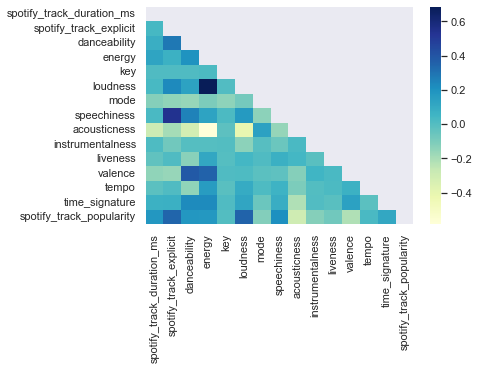

In [8]:
#Remove NaN values to check if any change in correlation heatmap -- there is No Change. 
feat_no_null = features.dropna(subset=['danceability'])
sns.heatmap(feat_no_null.corr(), cmap="YlGnBu", annot=False, mask=mask);

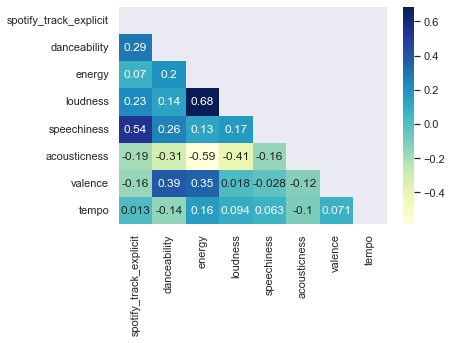

In [9]:
#Let's keep the features which are showing some interesting correlation relationships:

keep = ['spotify_track_explicit', 'danceability', 'energy', 'loudness', 
        'speechiness', 'acousticness', 'valence', 'tempo']

mask = np.triu(np.ones_like(features[keep].corr()))
sns.heatmap(features[keep].corr(), cmap='YlGnBu', annot=True, mask=mask);

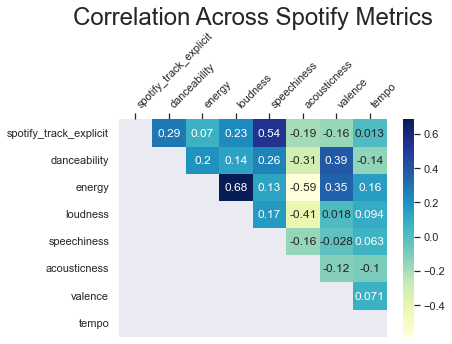

In [10]:
#Let's keep the features which are showing some interesting correlation relationships, switch triangle:

keep = ['spotify_track_explicit', 'danceability', 'energy', 'loudness', 
        'speechiness', 'acousticness', 'valence', 'tempo']

mask = np.tril(np.ones_like(features[keep].corr()))
ax = sns.heatmap(features[keep].corr(), cmap='YlGnBu', annot=True, mask=mask)
ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(keep, rotation=45, ha='left')
sns.set(rc = {'figure.figsize':(12,8)})
plt.savefig('Appendix_Feature_Correlation.png')
plt.title('Correlation Across Spotify Metrics', fontsize=24);


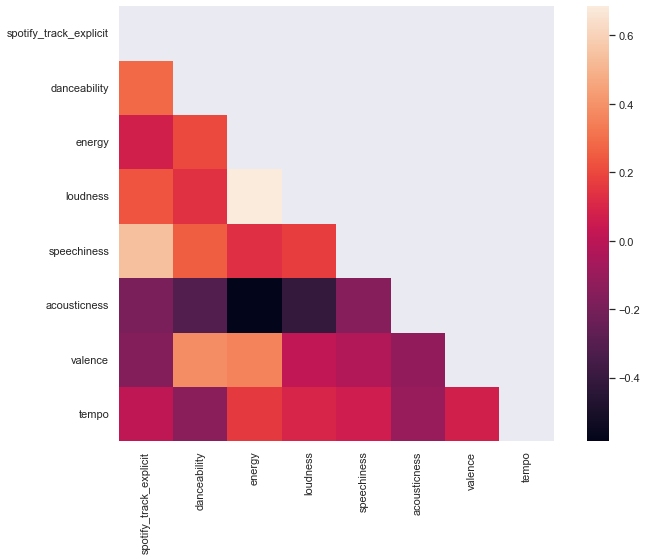

In [11]:
#Same plot with Seaborn

keep = ['spotify_track_explicit', 'danceability', 'energy', 'loudness', 
        'speechiness', 'acousticness', 'valence', 'tempo']

corr_matrix = features[keep].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, square=True);

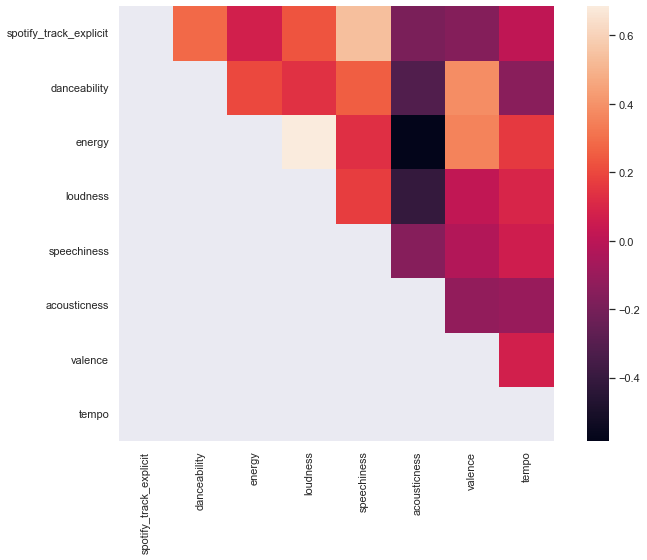

In [12]:
#Same plot with Seaborn, Lower Triangle as Mask

keep = ['spotify_track_explicit', 'danceability', 'energy', 'loudness', 
        'speechiness', 'acousticness', 'valence', 'tempo']

corr_matrix = features[keep].corr()
mask = np.zeros_like(corr_matrix)
mask[np.tril_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, square=True);